In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('balanced_mushroom_dataset.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,370,6,0,8,0.091942,642,5,0.943195,0
1,458,5,1,11,0.995173,597,12,0.888450,1
2,310,0,0,5,1.503632,193,6,0.888450,1
3,1559,6,5,11,1.217145,1777,6,0.943195,1
4,185,6,0,6,0.792245,547,7,0.888450,0


In [3]:
# Perform basic exploration
eda_summary = {
    "Shape": data.shape,
    "Data Types": data.dtypes,
    "Missing Values": data.isna().sum(),
    "Unique Values": data.nunique(),
    "Basic Statistics": data.describe(),
}

print("EDA Summary", eda_summary)

EDA Summary {'Shape': (20000, 9), 'Data Types': cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object, 'Missing Values': cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64, 'Unique Values': cap-diameter       1705
cap-shape             7
gill-attachment       7
gill-color           12
stem-height        1342
stem-width         3161
stem-color           13
season                4
class                 2
dtype: int64, 'Basic Statistics':        cap-diameter     cap-shape  gill-attachment   gill-color   stem-height  \
count  20000.000000  20000.000000     20000.000000  20000.00000  20000.000000   
mean     575.357600      4.044550         2.

Univariate Analysis for Numerical Variables:


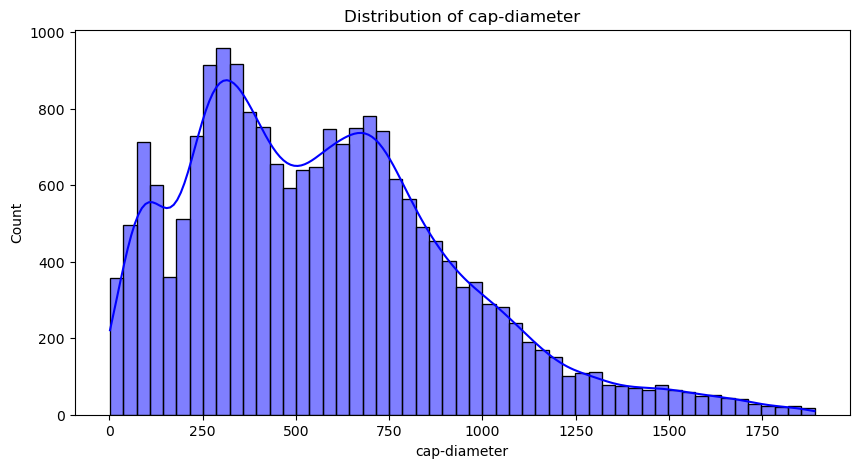

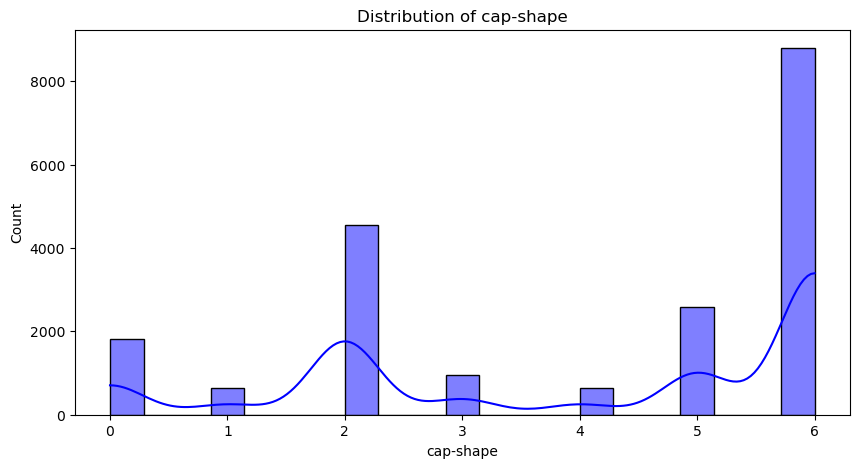

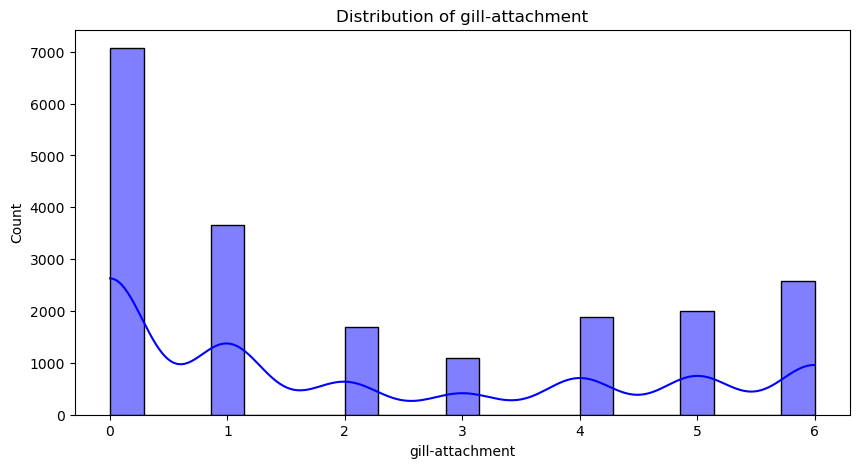

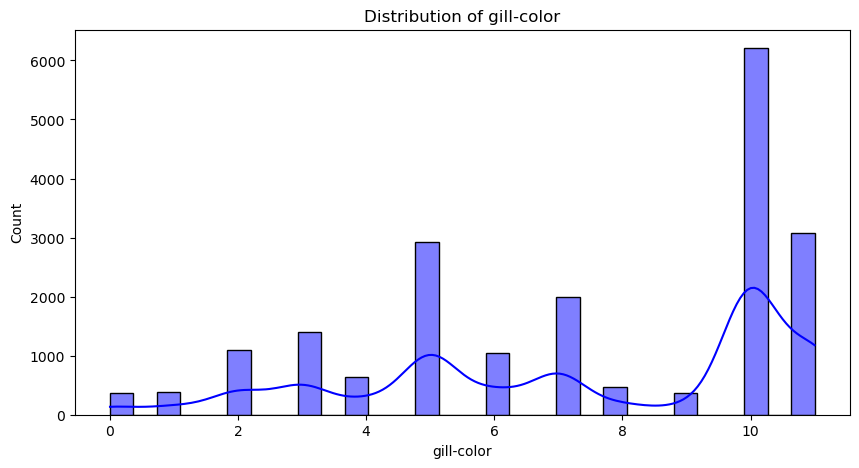

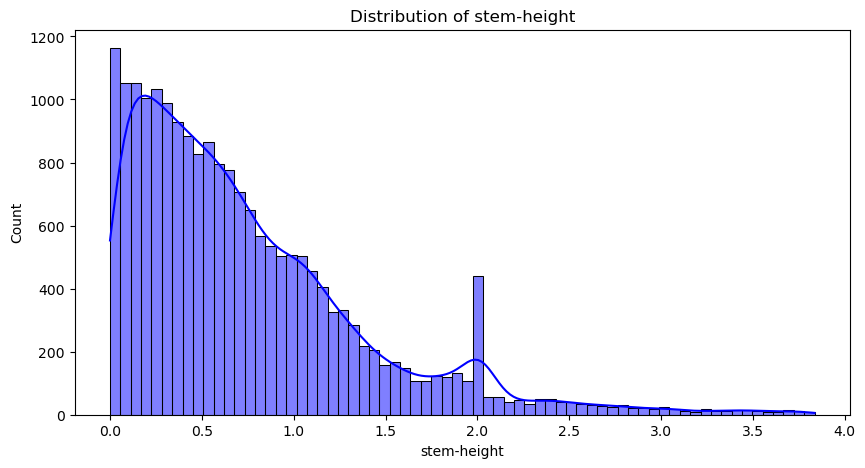

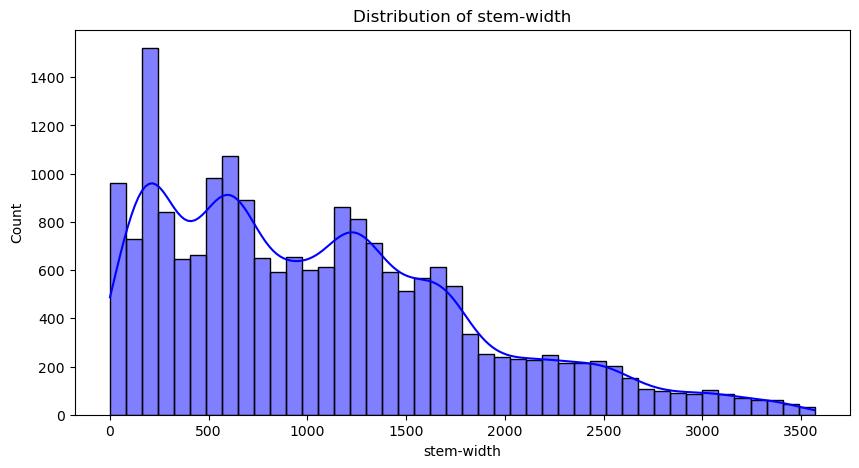

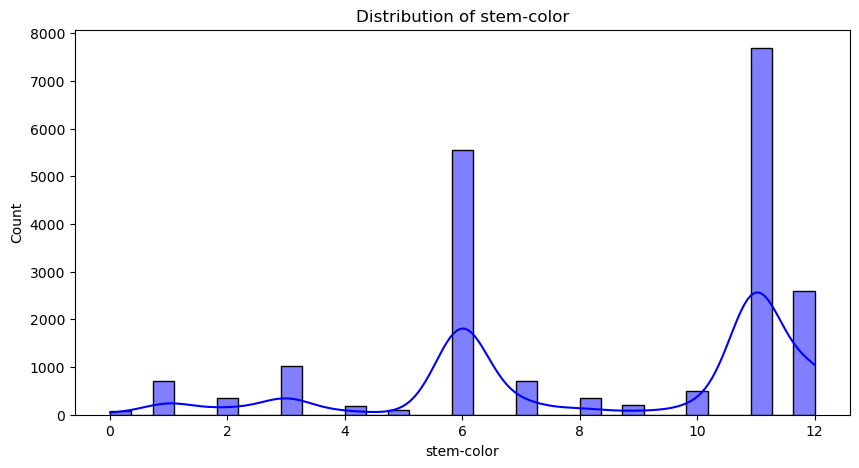

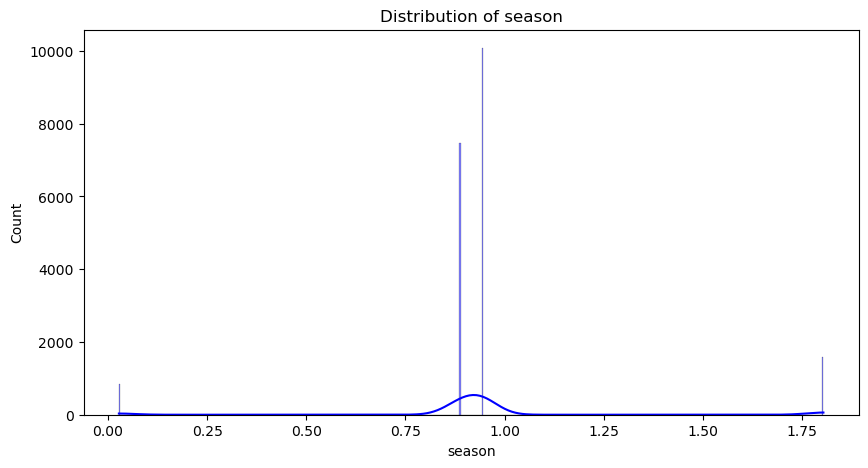

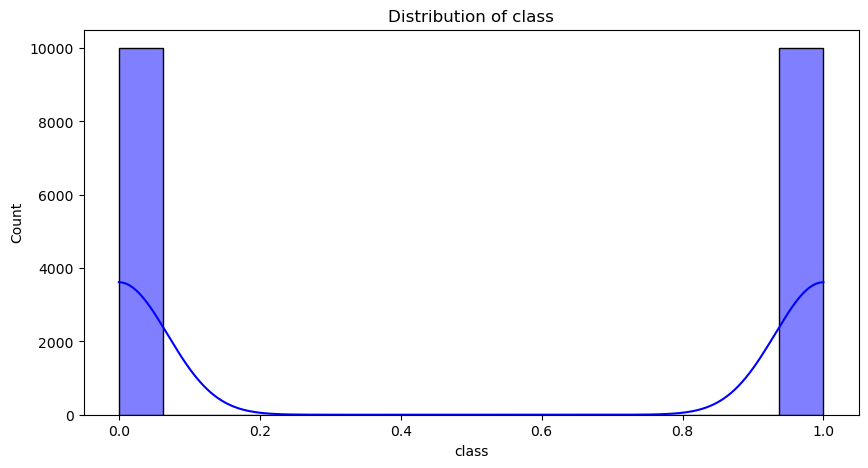

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis for numerical variables
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Univariate Analysis for Numerical Variables:")
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=data, x=column, kde=True, color="blue")
    plt.title(f"Distribution of {column}")
    plt.show()


In [5]:
import numpy as np
#find the columns with Numrical data
num_columns = data.select_dtypes(include=[np.number]).columns.tolist()
# Print the columns
print("Numerical Columns:", num_columns)

Numerical Columns: ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season', 'class']


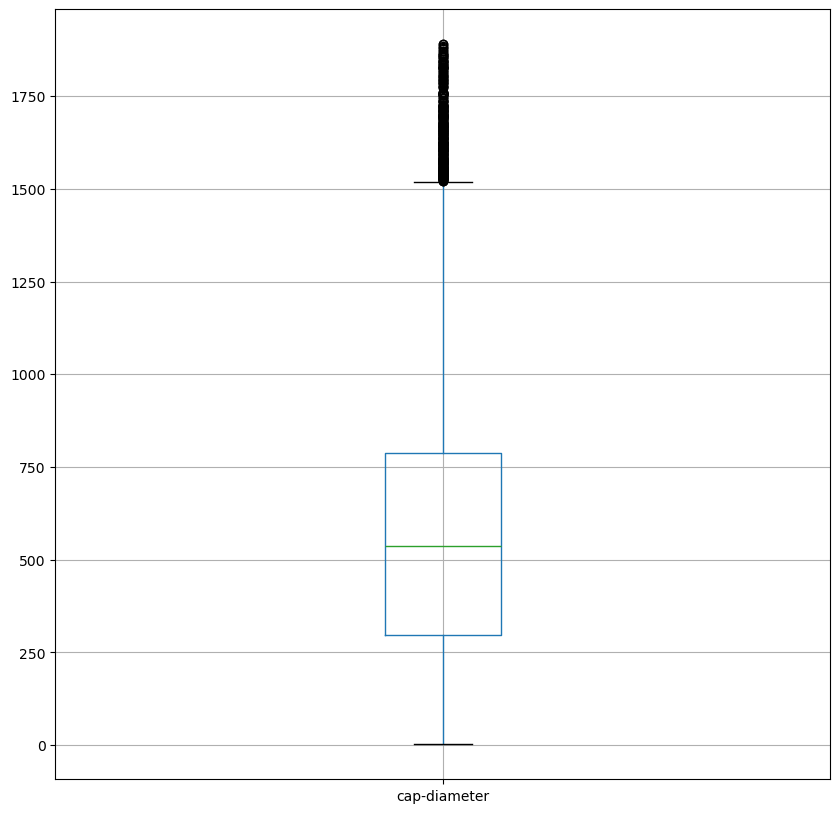

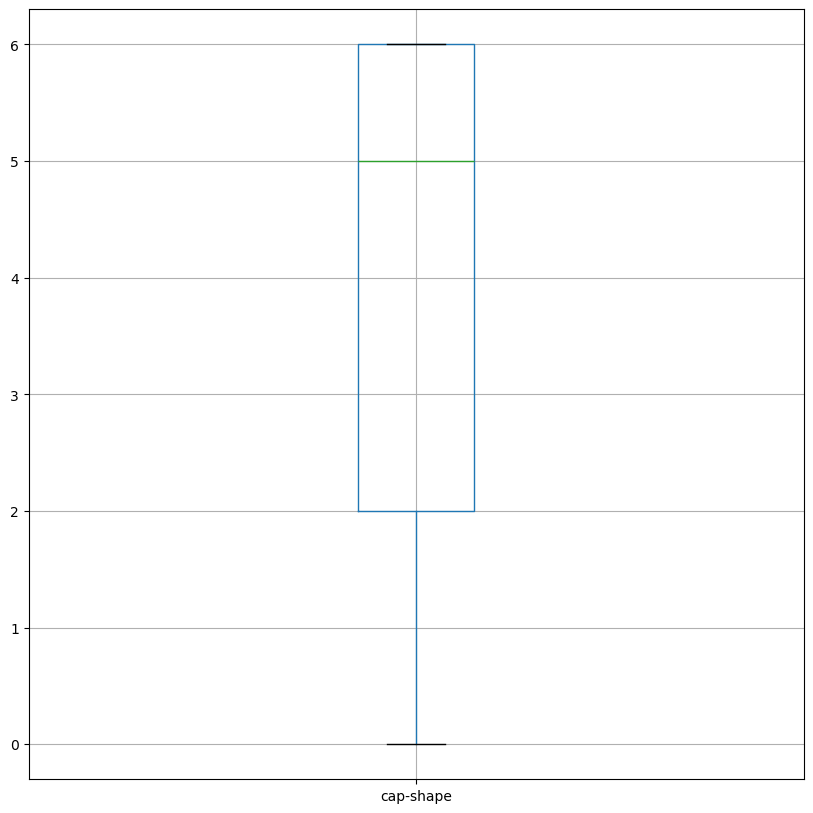

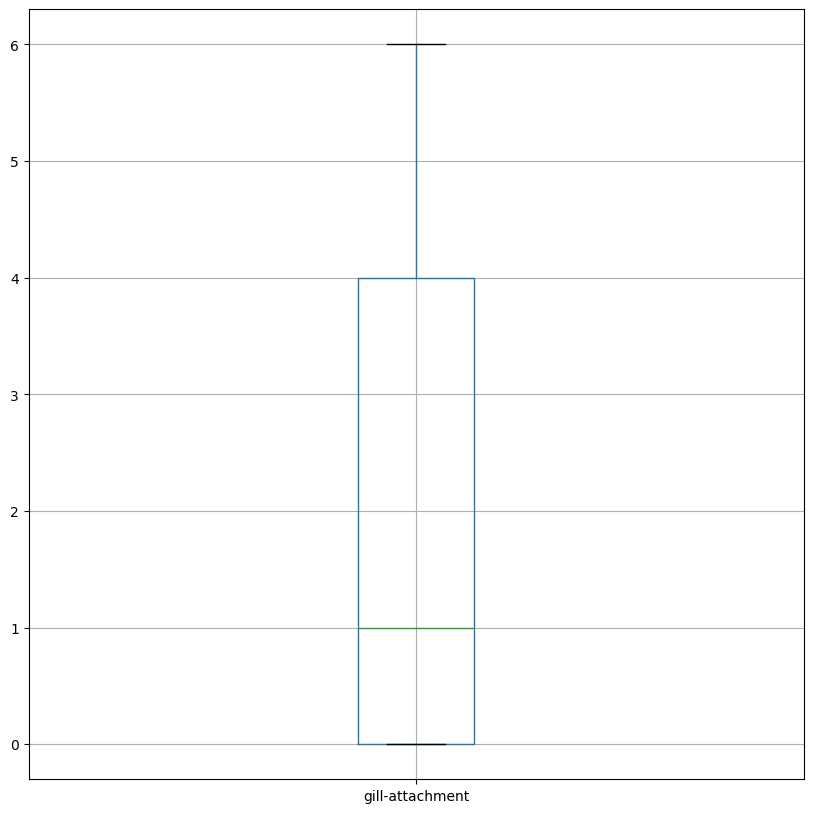

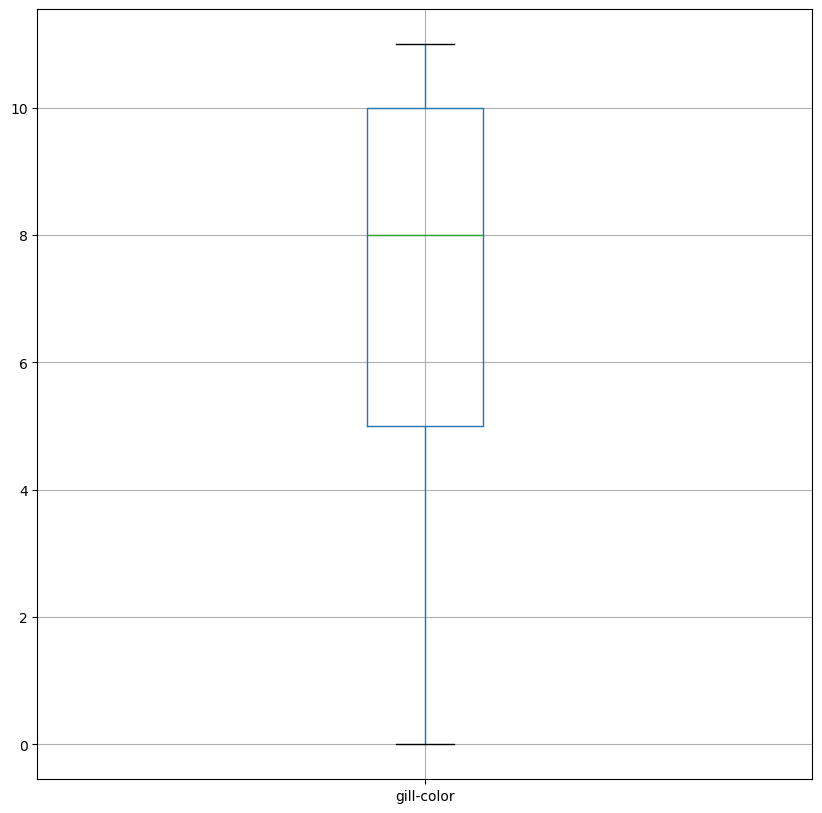

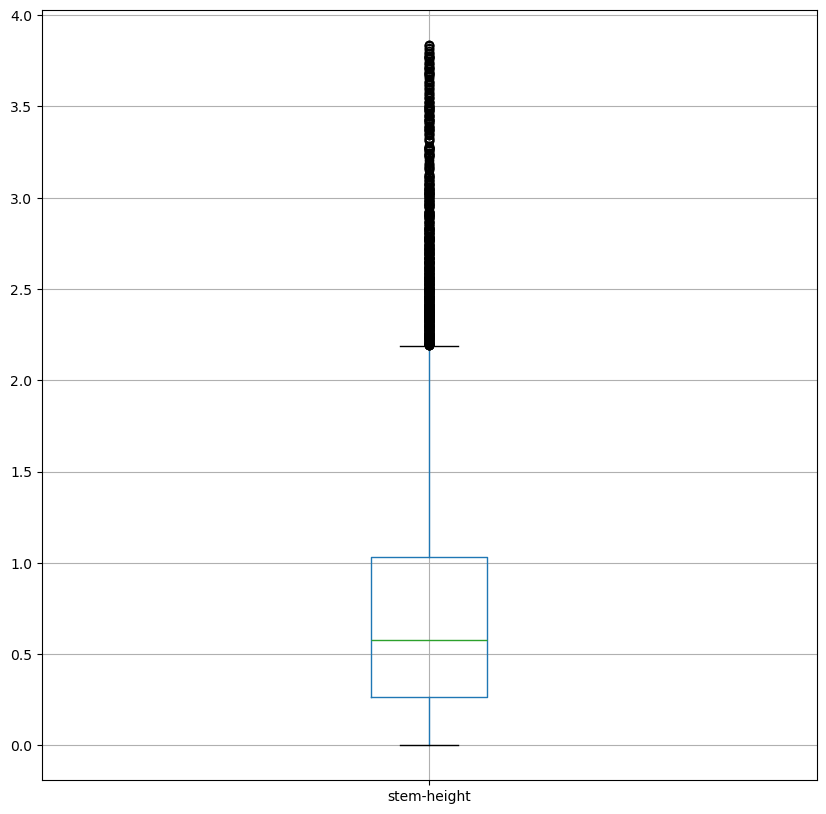

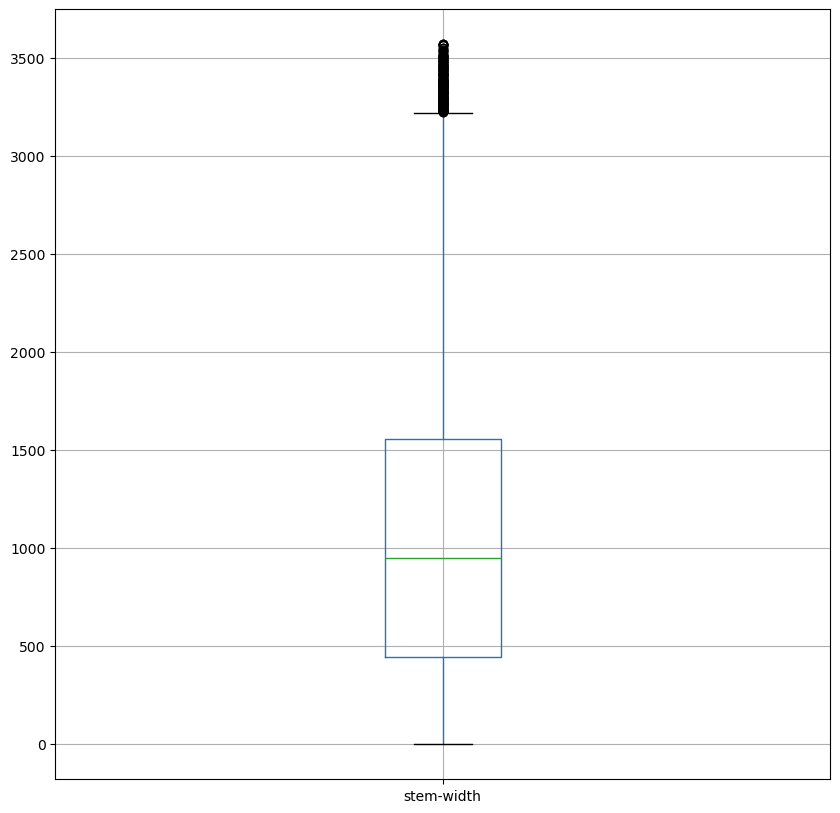

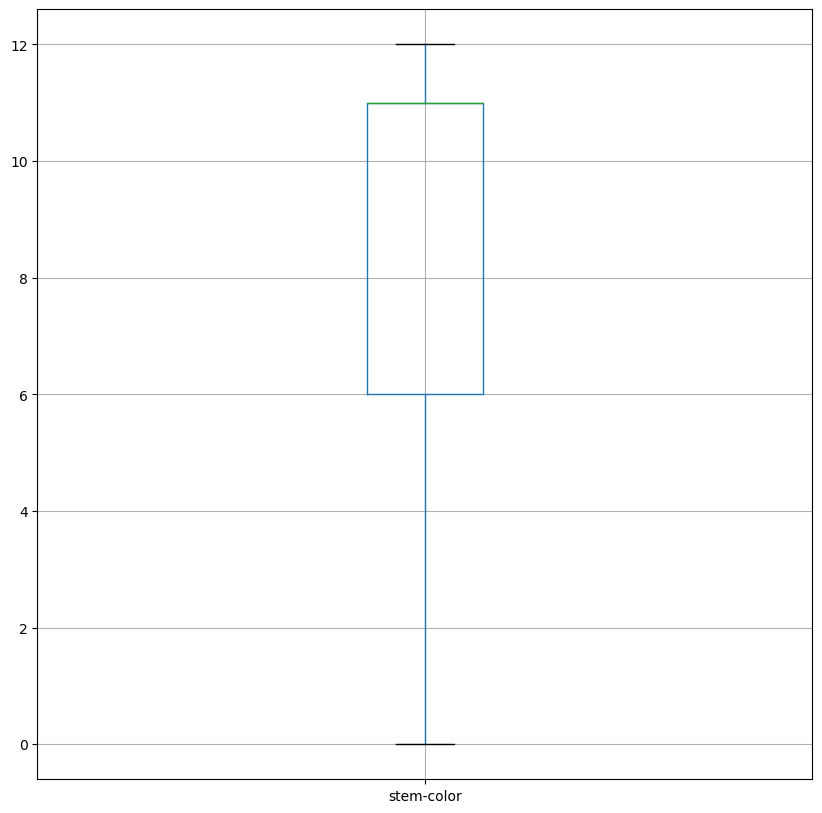

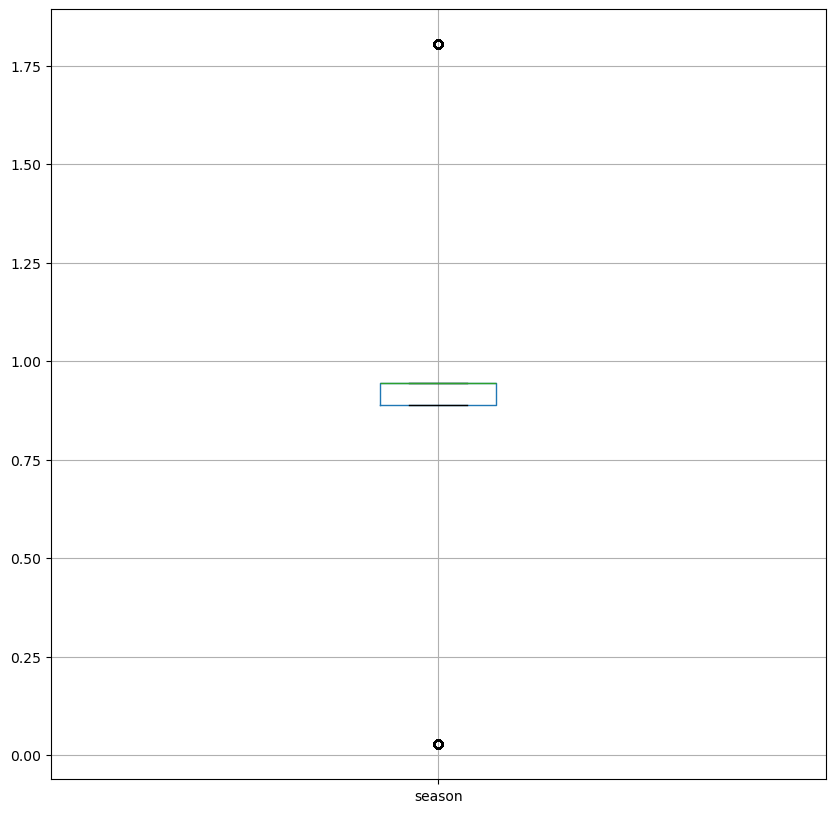

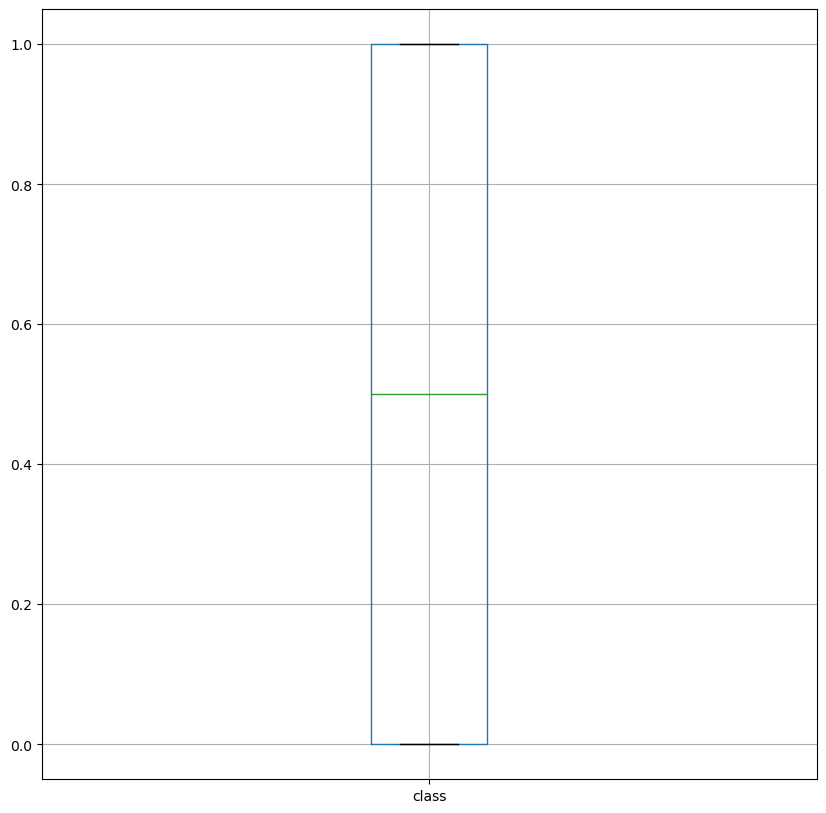

In [6]:
for var in num_columns:
    data.boxplot(column = var, figsize=(10,10))
    plt.show()

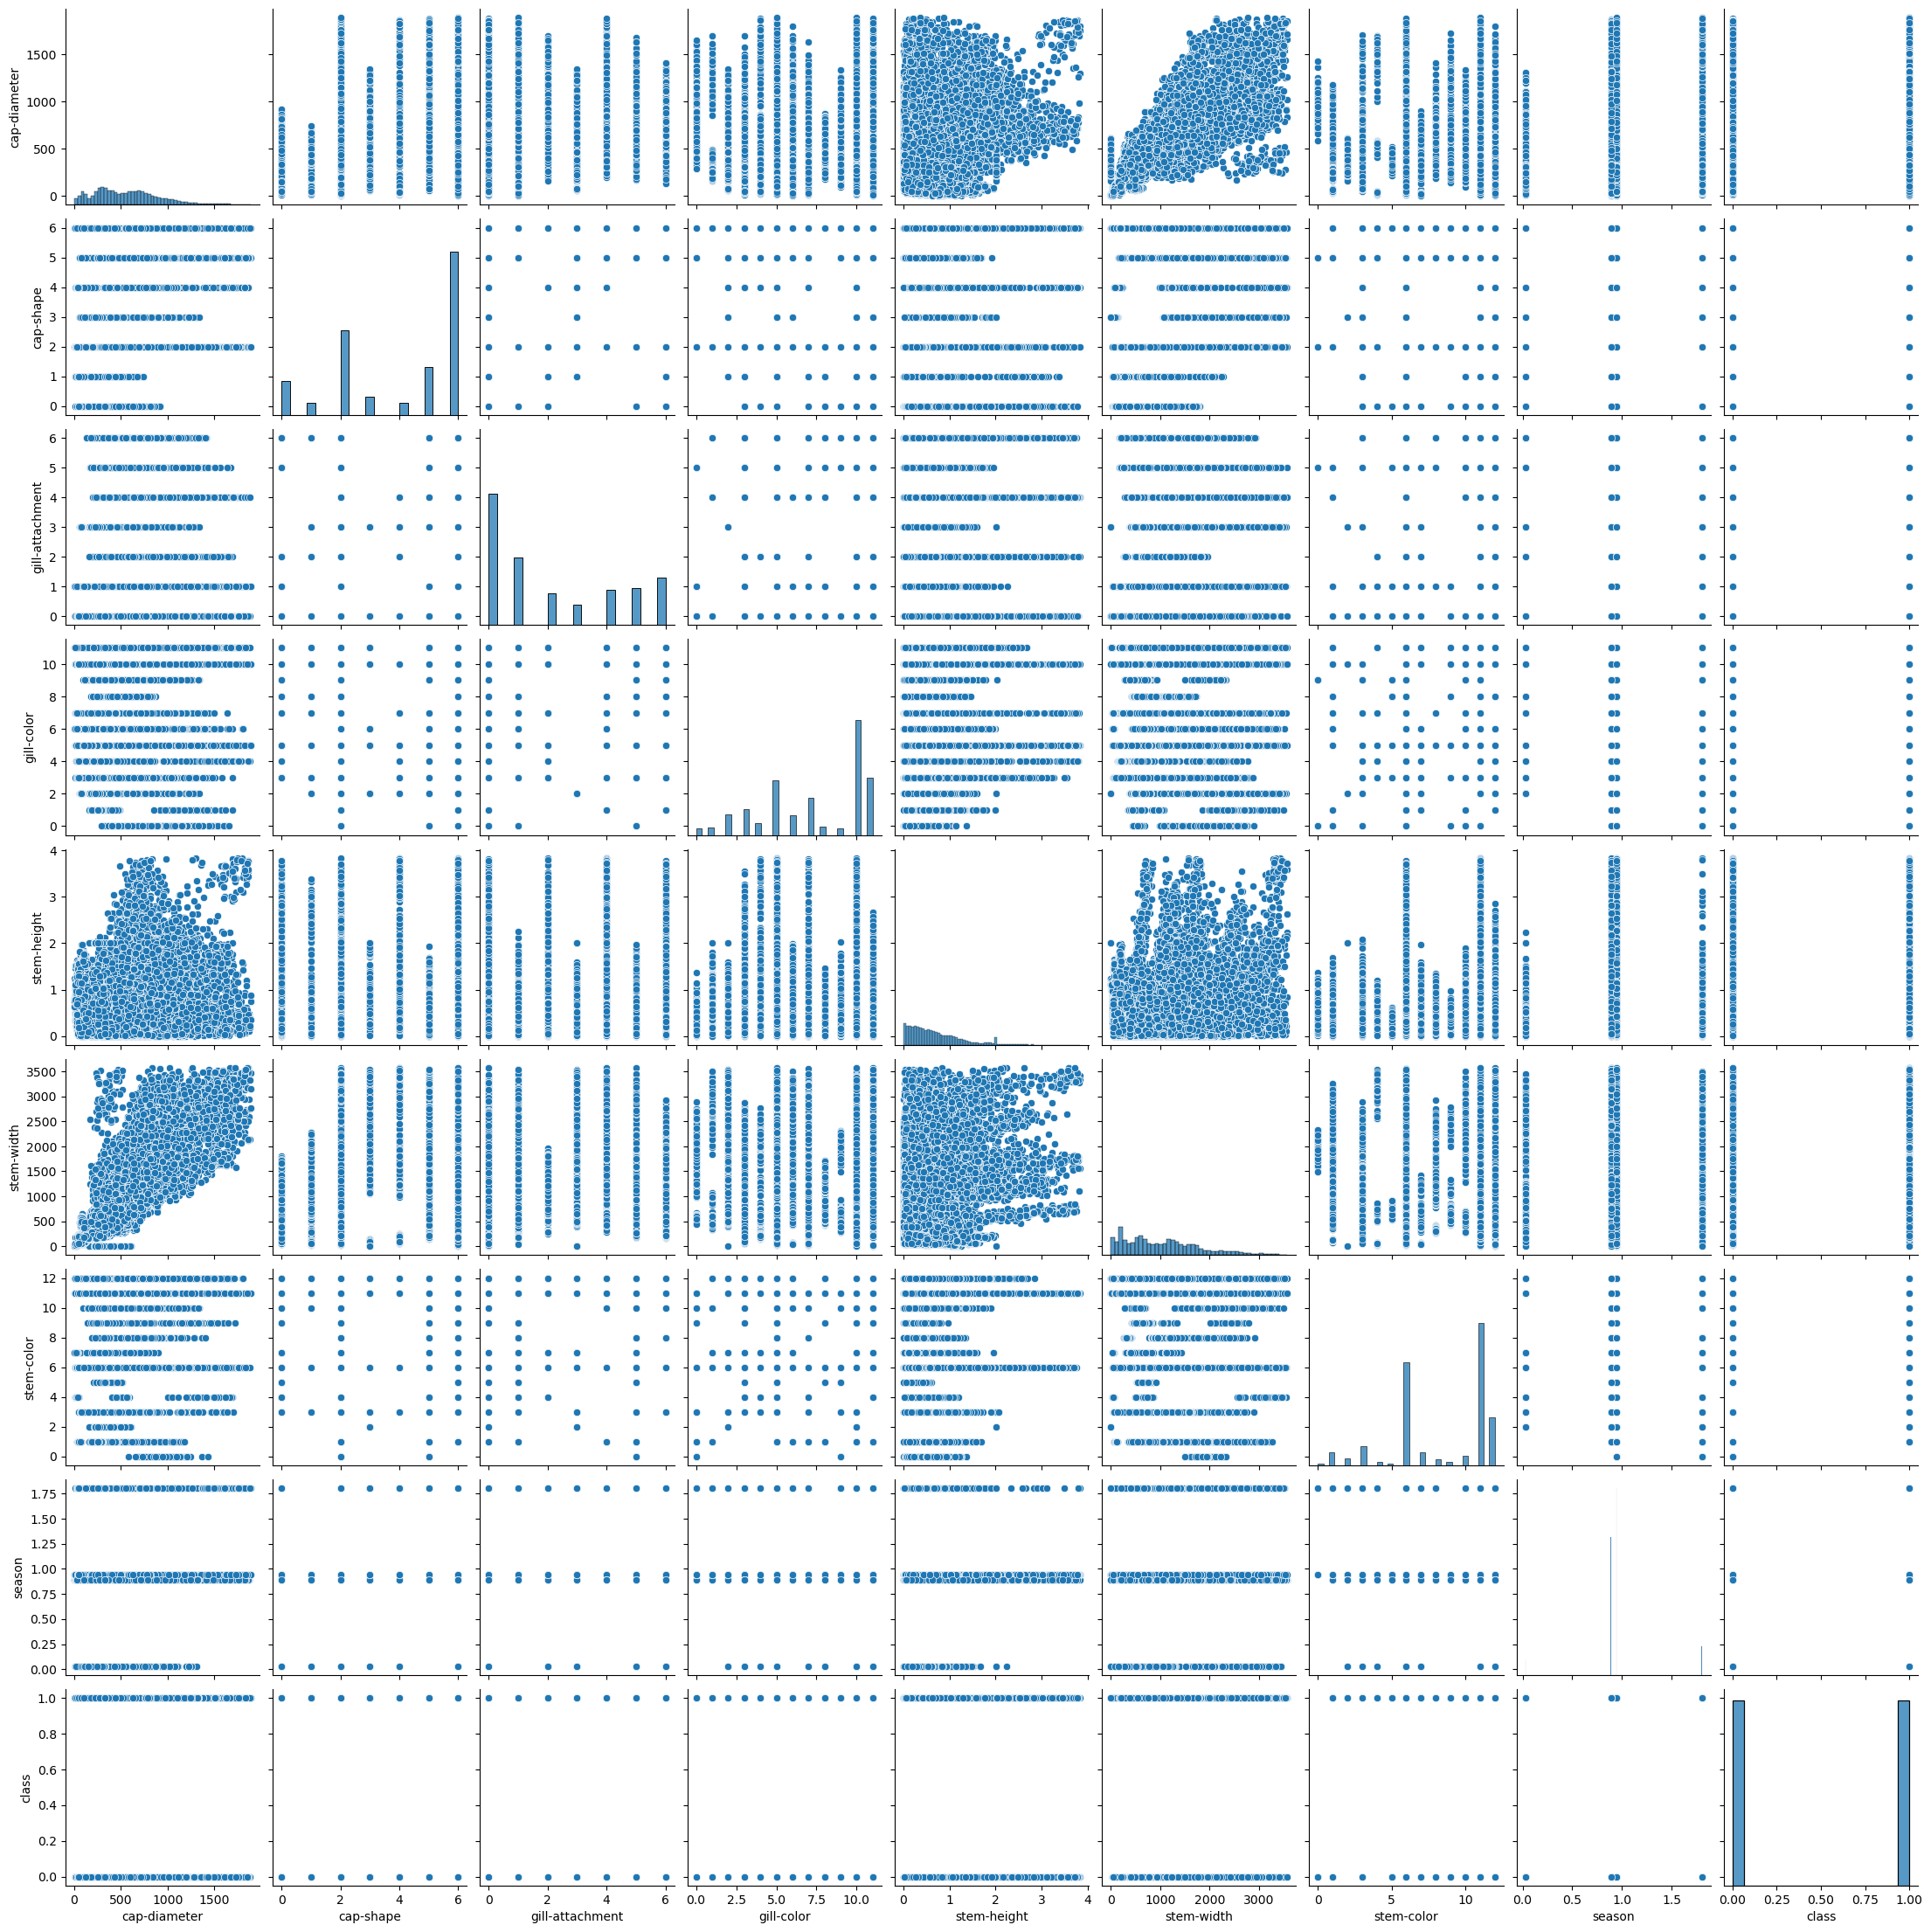

In [7]:
#Plotting each numeric predictor against the other
sns.pairplot(data)

In [8]:
#Checking the highly correlated variables
corr_values = data.corr().unstack().reset_index()
print(corr_values.shape)
corr_values2 = corr_values[corr_values['level_0'] > corr_values['level_1'] ]
print(corr_values2.shape)
corr_values2.columns = ['var1', 'var2', 'corr_value']
corr_values2['corr_abs'] = corr_values2['corr_value'].abs()
corr_values2.sort_values( 'corr_abs', ascending=False, inplace=True)
corr_values2.head(10)

(81, 3)
(36, 3)


C:\Users\Jani Begam\AppData\Local\Temp\ipykernel_33488\2337501573.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_values2['corr_abs'] = corr_values2['corr_value'].abs()
C:\Users\Jani Begam\AppData\Local\Temp\ipykernel_33488\2337501573.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_values2.sort_values( 'corr_abs', ascending=False, inplace=True)


,var1,var2,corr_value,corr_abs
45,stem-width,cap-diameter,0.827183,0.827183
47,stem-width,gill-attachment,0.249442,0.249442
46,stem-width,cap-shape,0.217119,0.217119
9,cap-shape,cap-diameter,0.202073,0.202073
18,gill-attachment,cap-diameter,0.197797,0.197797
44,stem-height,class,0.183736,0.183736
53,stem-width,class,-0.177642,0.177642
27,gill-color,cap-diameter,0.175444,0.175444
57,stem-color,gill-color,0.172788,0.172788
72,class,cap-diameter,-0.164285,0.164285


                 cap-diameter  cap-shape  gill-attachment  gill-color  \
cap-diameter         1.000000   0.202073         0.197797    0.175444   
cap-shape            0.202073   1.000000         0.032831    0.132863   
gill-attachment      0.197797   0.032831         1.000000    0.095049   
gill-color           0.175444   0.132863         0.095049    1.000000   
stem-height          0.149231   0.008105         0.071608    0.019397   
stem-width           0.827183   0.217119         0.249442    0.099368   
stem-color           0.123256   0.035694         0.014368    0.172788   
season               0.105835   0.049631         0.044036    0.049016   
class                0.164285   0.127962         0.056870    0.063029   

                 stem-height  stem-width  stem-color    season     class  
cap-diameter        0.149231    0.827183    0.123256  0.105835  0.164285  
cap-shape           0.008105    0.217119    0.035694  0.049631  0.127962  
gill-attachment     0.071608    0.249442    

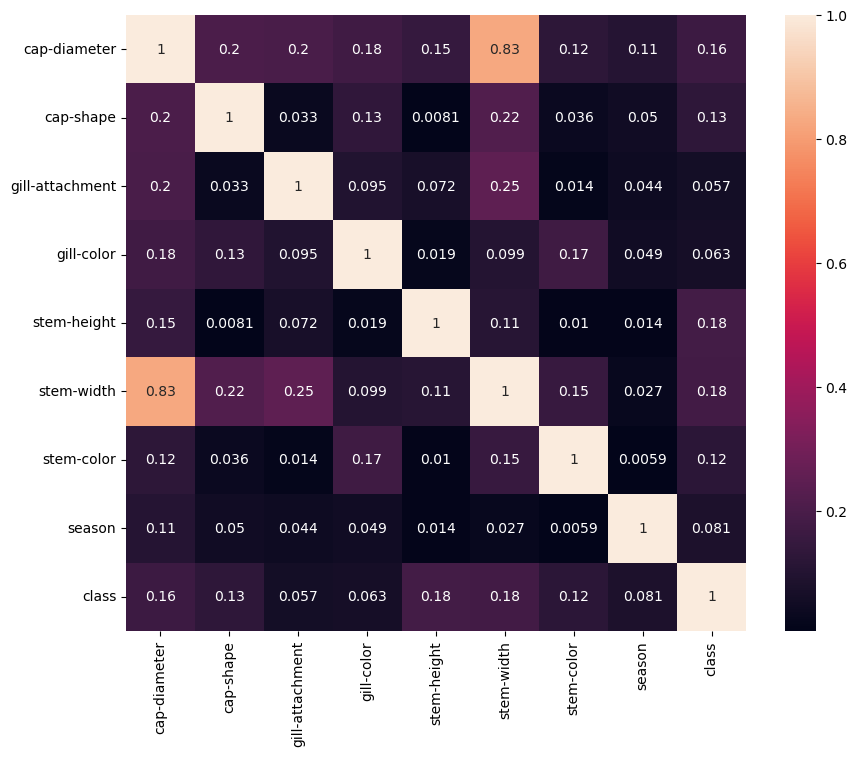

In [9]:
#creating a heat map to see the degree of correlation visually
plt.figure(figsize=(10, 8) )
correlation_matrix = data.corr().abs()
sns.heatmap(correlation_matrix, xticklabels = correlation_matrix.columns.values,yticklabels = correlation_matrix.columns.values, annot = True)

# Print the correlation matrix
print(correlation_matrix)

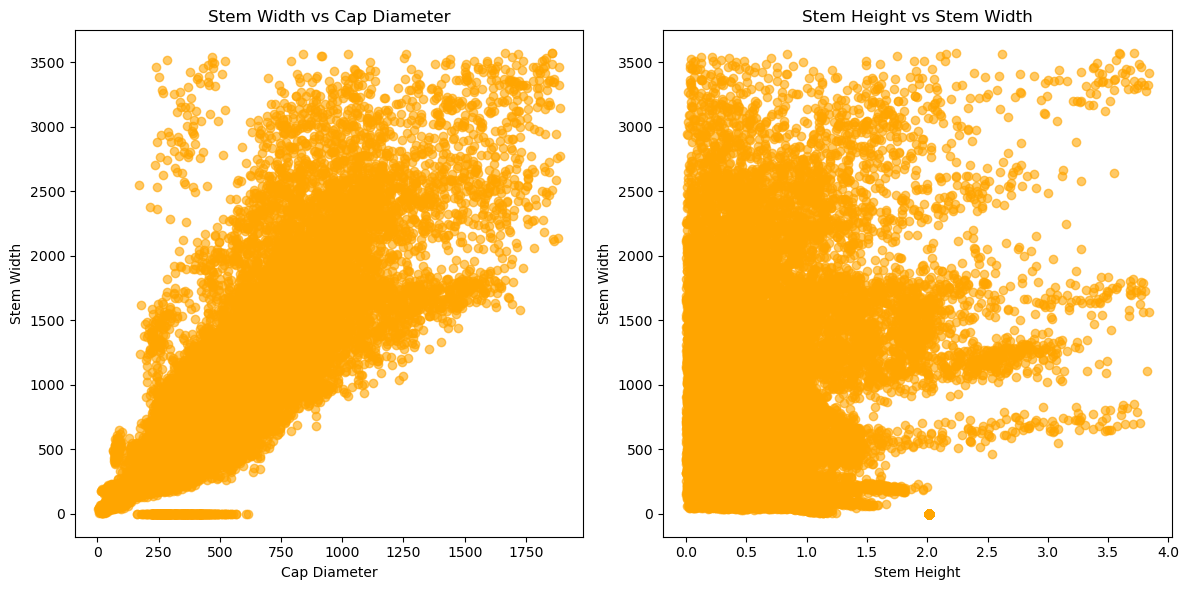

In [10]:
# Plot scatter plots for highly correlated features
plt.figure(figsize=(12, 6))

# Scatter plot for stem-width vs cap-diameter
plt.subplot(1, 2, 1)
plt.scatter(data['cap-diameter'], data['stem-width'], alpha=0.6, color='#FFA500')
plt.title('Stem Width vs Cap Diameter')
plt.xlabel('Cap Diameter')
plt.ylabel('Stem Width')

# Scatter plot for other correlated features if any
plt.subplot(1, 2, 2)
plt.scatter(data['stem-height'], data['stem-width'], alpha=0.6, color='#FFA500')
plt.title('Stem Height vs Stem Width')
plt.xlabel('Stem Height')
plt.ylabel('Stem Width')

plt.tight_layout()
plt.show()

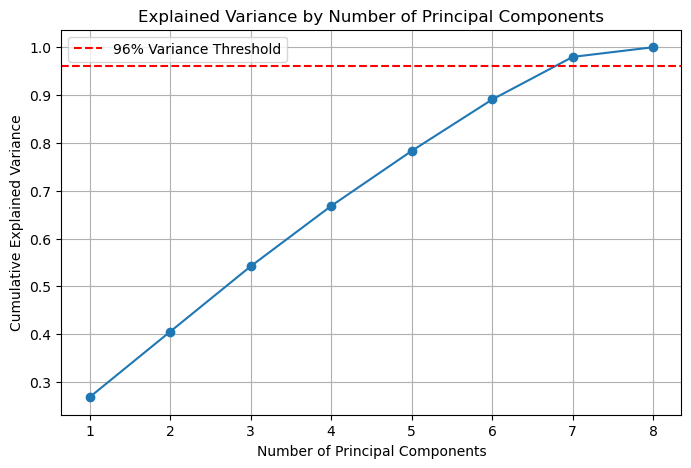

Optimal Features required is 7


In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (excluding the target variable 'class')
features = data.drop('class', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
pca.fit(features_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance to find the optimal number of components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.96, color='r', linestyle='--', label='96% Variance Threshold')
plt.legend()
plt.grid()
plt.show()

# Identify the number of components that explain at least 98% of the variance
optimal_components = np.argmax(explained_variance >= 0.96) + 1
print('Optimal Features required is',optimal_components)

In [12]:
# Reduce the dataset using PCA with the optimal number of components
pca = PCA(n_components=7)
features_reduced = pca.fit_transform(features_scaled)

# Add the target variable back to the reduced dataset
reduced_data = pd.DataFrame(features_reduced, columns=[f'PC{i+1}' for i in range(7)])
reduced_data['class'] = data['class']

# Display the reduced dataset
print('Reduced Dataset after PCA')

# Proceed to classification model analysis
reduced_data.head()


Reduced Dataset after PCA


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,class
0,-0.981796,-0.387351,0.016768,1.256846,-1.157988,-0.065358,0.744534,0
1,-0.074859,-1.428218,0.764198,-0.790288,-0.518177,0.231899,-0.142477,1
2,-2.075647,1.342091,0.896662,-1.030628,0.693502,0.453438,0.430376,1
3,3.006212,0.584516,-0.286614,0.363394,-0.386759,1.334651,0.337642,1
4,-1.273847,-0.010297,0.549904,0.428143,-1.241764,-0.201071,-0.254838,0


C:\Users\Jani Begam\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


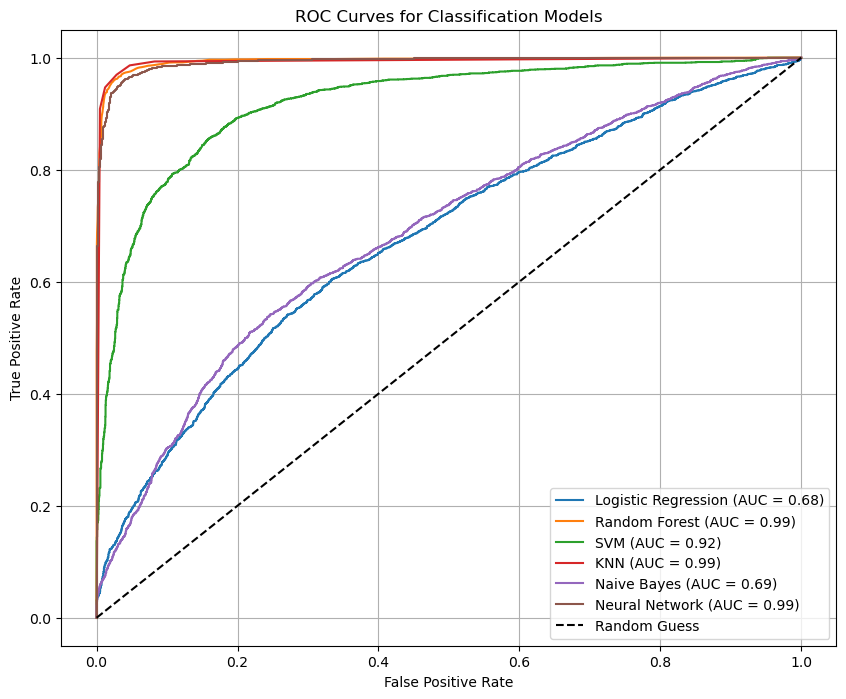

{'Logistic Regression': {'AUC': 0.6752635555555555,
  'Confusion Matrix': array([[1995, 1005],
         [1184, 1816]], dtype=int64)},
 'Random Forest': {'AUC': 0.9944406666666666,
  'Confusion Matrix': array([[2918,   82],
         [ 114, 2886]], dtype=int64)},
 'SVM': {'AUC': 0.9198062222222222,
  'Confusion Matrix': array([[2569,  431],
         [ 504, 2496]], dtype=int64)},
 'KNN': {'AUC': 0.9924149999999999,
  'Confusion Matrix': array([[2915,   85],
         [  91, 2909]], dtype=int64)},
 'Naive Bayes': {'AUC': 0.6873785555555555,
  'Confusion Matrix': array([[2044,  956],
         [1177, 1823]], dtype=int64)},
 'Neural Network': {'AUC': 0.992388,
  'Confusion Matrix': array([[2893,  107],
         [ 133, 2867]], dtype=int64)}}

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Split the reduced dataset into train and test sets
X = reduced_data.drop('class', axis=1)
y = reduced_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the classifiers
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(random_state=42, max_iter=500)
}

# Fit the models and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    auc_score = roc_auc_score(y_test, y_proba)
    results[name] = {
        "model": model,
        "auc": auc_score,
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "roc_curve": roc_curve(y_test, y_proba)
    }

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for name, result in results.items():
    fpr, tpr, _ = result["roc_curve"]
    plt.plot(fpr, tpr, label=f"{name} (AUC = {result['auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curves for Classification Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# Display AUC scores and confusion matrices
results_summary = {name: {"AUC": result["auc"], "Confusion Matrix": result["confusion_matrix"]} for name, result in results.items()}
results_summary

Confusion Matrix for Logistic Regression:
[[1995 1005]
 [1184 1816]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

      Edible       0.63      0.67      0.65      3000
  Not Edible       0.64      0.61      0.62      3000

    accuracy                           0.64      6000
   macro avg       0.64      0.64      0.63      6000
weighted avg       0.64      0.64      0.63      6000



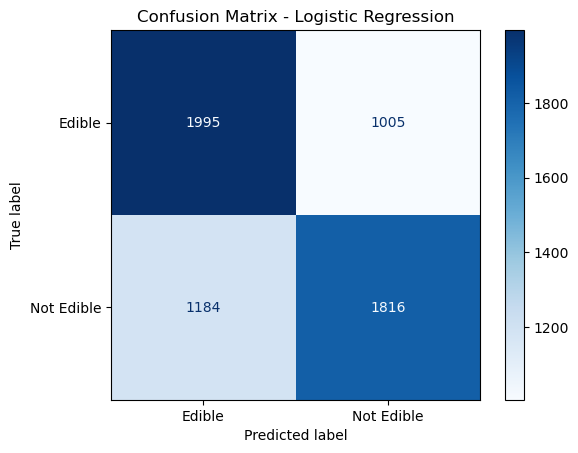

Confusion Matrix for Random Forest:
[[2918   82]
 [ 114 2886]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

      Edible       0.96      0.97      0.97      3000
  Not Edible       0.97      0.96      0.97      3000

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



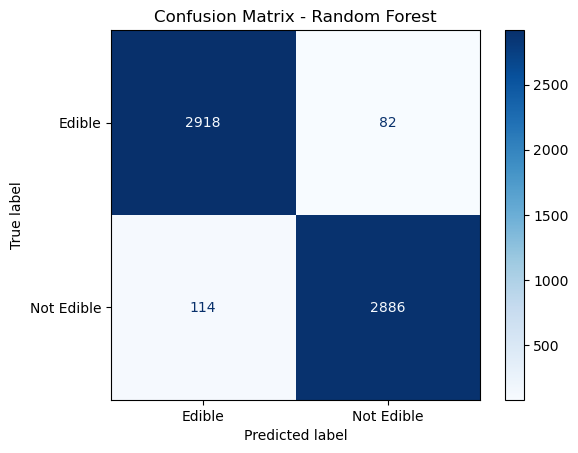

Confusion Matrix for SVM:
[[2569  431]
 [ 504 2496]]

Classification Report for SVM:
              precision    recall  f1-score   support

      Edible       0.84      0.86      0.85      3000
  Not Edible       0.85      0.83      0.84      3000

    accuracy                           0.84      6000
   macro avg       0.84      0.84      0.84      6000
weighted avg       0.84      0.84      0.84      6000



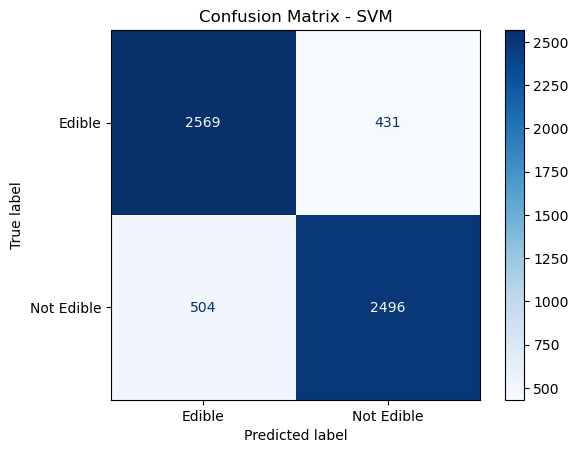

Confusion Matrix for KNN:
[[2915   85]
 [  91 2909]]

Classification Report for KNN:
              precision    recall  f1-score   support

      Edible       0.97      0.97      0.97      3000
  Not Edible       0.97      0.97      0.97      3000

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



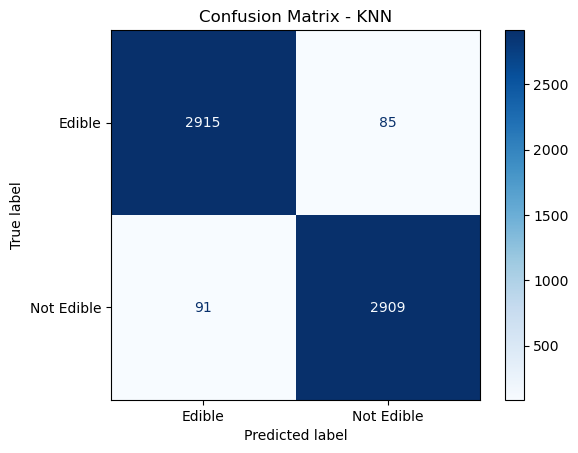

Confusion Matrix for Naive Bayes:
[[2044  956]
 [1177 1823]]

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

      Edible       0.63      0.68      0.66      3000
  Not Edible       0.66      0.61      0.63      3000

    accuracy                           0.64      6000
   macro avg       0.65      0.64      0.64      6000
weighted avg       0.65      0.64      0.64      6000



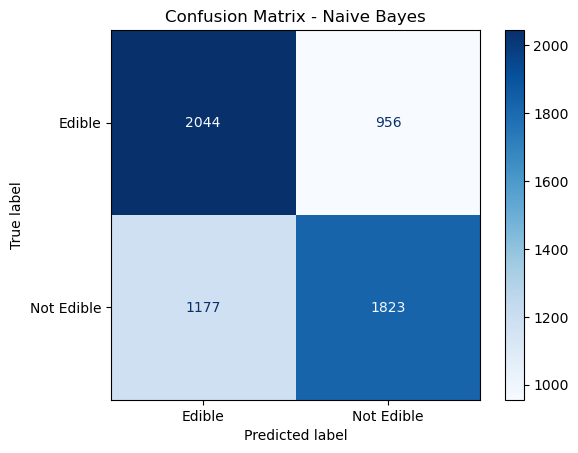

Confusion Matrix for Neural Network:
[[2893  107]
 [ 133 2867]]

Classification Report for Neural Network:
              precision    recall  f1-score   support

      Edible       0.96      0.96      0.96      3000
  Not Edible       0.96      0.96      0.96      3000

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000



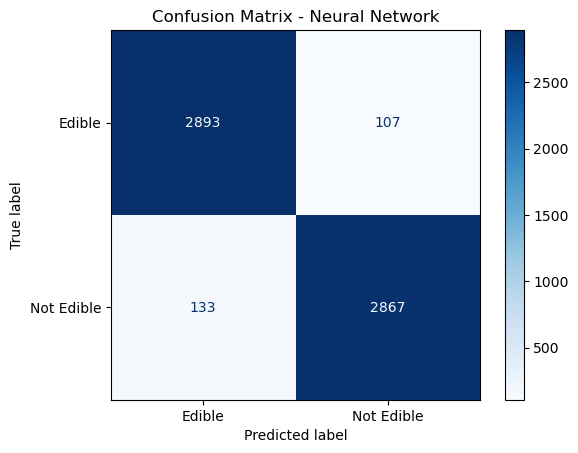

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

# Display metrics and detailed confusion matrix for each algorithm
for name, result in results.items():
    # Retrieve predictions and confusion matrix
    y_pred = result["model"].predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Retrieve classification report
    classification_rep = classification_report(y_test, y_pred, target_names=["Edible", "Not Edible"])
    
    # Print detailed metrics
    print(f"Confusion Matrix for {name}:\n{conf_matrix}")
    print(f"\nClassification Report for {name}:\n{classification_rep}")
    
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Edible", "Not Edible"])
    disp.plot(cmap="Blues")
    disp.ax_.set_title(f"Confusion Matrix - {name}")
    plt.show()


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Define the parameter grid for hyperparameter tuning
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'n_estimators': [10, 25, 30, 50, 100, 200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1,
                           verbose=1,
                           scoring="accuracy")

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 200}


In [16]:
# Evaluate the tuned model
y_proba_best = best_rf.predict_proba(X_test)[:, 1]

# Threshold tuning
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
results_threshold = {}

for threshold in thresholds:
    y_pred_threshold = (y_proba_best >= threshold).astype(int)
    confusion = confusion_matrix(y_test, y_pred_threshold)
    false_negatives = confusion[1][0]  # Non-edible misclassified as edible
    auc_score = roc_auc_score(y_test, y_proba_best)
    results_threshold[threshold] = {
        "Confusion Matrix": confusion,
        "False Negatives": false_negatives,
        "AUC": auc_score
    }

# Display results for different thresholds
print("Threshold Tuning Results", results_threshold)

Threshold Tuning Results {0.3: {'Confusion Matrix': array([[2581,  419],
       [  32, 2968]], dtype=int64), 'False Negatives': 32, 'AUC': 0.9922122222222223}, 0.4: {'Confusion Matrix': array([[2766,  234],
       [  62, 2938]], dtype=int64), 'False Negatives': 62, 'AUC': 0.9922122222222223}, 0.5: {'Confusion Matrix': array([[2880,  120],
       [ 128, 2872]], dtype=int64), 'False Negatives': 128, 'AUC': 0.9922122222222223}, 0.6: {'Confusion Matrix': array([[2947,   53],
       [ 244, 2756]], dtype=int64), 'False Negatives': 244, 'AUC': 0.9922122222222223}, 0.7: {'Confusion Matrix': array([[2983,   17],
       [ 425, 2575]], dtype=int64), 'False Negatives': 425, 'AUC': 0.9922122222222223}}


In [17]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
# Adjust the classification threshold to minimize false negatives
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
results_threshold = {}

for threshold in thresholds:
    y_pred_threshold = (y_proba_best >= threshold).astype(int)
    confusion = confusion_matrix(y_test, y_pred_threshold)
    false_negatives = confusion[1][0]  # Non-edible misclassified as edible
    auc_score = roc_auc_score(y_test, y_proba_best)
    results_threshold[threshold] = {
        "Confusion Matrix": confusion,
        "False Negatives": false_negatives,
        "AUC": auc_score
    }

# Display results for different thresholds
print('Threshold Tuning Results', results_threshold)

# Suggest the best threshold to minimize false negatives
results_threshold


Threshold Tuning Results {0.3: {'Confusion Matrix': array([[2581,  419],
       [  32, 2968]], dtype=int64), 'False Negatives': 32, 'AUC': 0.9922122222222223}, 0.4: {'Confusion Matrix': array([[2766,  234],
       [  62, 2938]], dtype=int64), 'False Negatives': 62, 'AUC': 0.9922122222222223}, 0.5: {'Confusion Matrix': array([[2880,  120],
       [ 128, 2872]], dtype=int64), 'False Negatives': 128, 'AUC': 0.9922122222222223}, 0.6: {'Confusion Matrix': array([[2947,   53],
       [ 244, 2756]], dtype=int64), 'False Negatives': 244, 'AUC': 0.9922122222222223}, 0.7: {'Confusion Matrix': array([[2983,   17],
       [ 425, 2575]], dtype=int64), 'False Negatives': 425, 'AUC': 0.9922122222222223}}


{0.3: {'Confusion Matrix': array([[2581,  419],
         [  32, 2968]], dtype=int64),
  'False Negatives': 32,
  'AUC': 0.9922122222222223},
 0.4: {'Confusion Matrix': array([[2766,  234],
         [  62, 2938]], dtype=int64),
  'False Negatives': 62,
  'AUC': 0.9922122222222223},
 0.5: {'Confusion Matrix': array([[2880,  120],
         [ 128, 2872]], dtype=int64),
  'False Negatives': 128,
  'AUC': 0.9922122222222223},
 0.6: {'Confusion Matrix': array([[2947,   53],
         [ 244, 2756]], dtype=int64),
  'False Negatives': 244,
  'AUC': 0.9922122222222223},
 0.7: {'Confusion Matrix': array([[2983,   17],
         [ 425, 2575]], dtype=int64),
  'False Negatives': 425,
  'AUC': 0.9922122222222223}}

<Figure size 600x600 with 0 Axes>

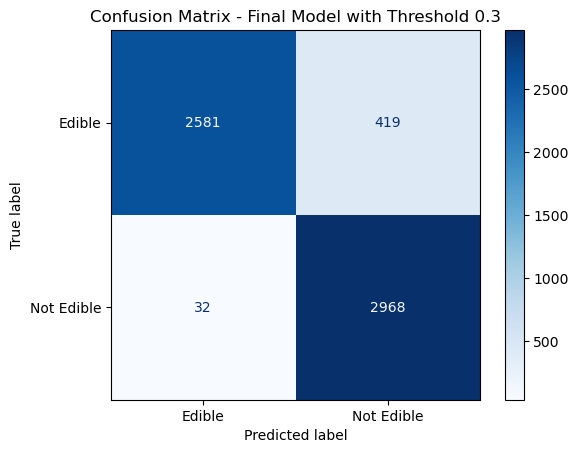

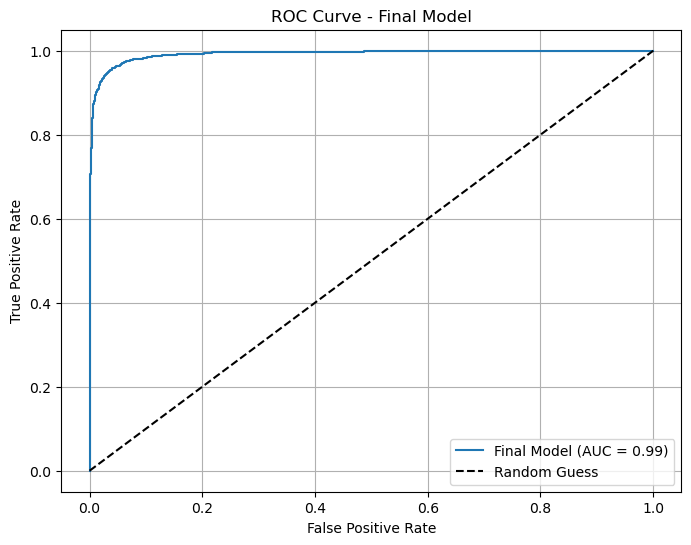

Confusion Matrix for Random Forest with Thresold 0.3:
[[2581  419]
 [  32 2968]]

Classification Report for Random Forest with Thresold 0.3:
              precision    recall  f1-score   support

      Edible       0.99      0.86      0.92      3000
  Not Edible       0.88      0.99      0.93      3000

    accuracy                           0.92      6000
   macro avg       0.93      0.92      0.92      6000
weighted avg       0.93      0.92      0.92      6000

ROC_AUC for Random Forest with Thresold 0.3:
0.9922122222222223


In [18]:
# Finalize the model with the optimal threshold (0.3)
final_threshold = 0.3
y_pred_final = (y_proba_best >= final_threshold).astype(int)

# Recalculate confusion matrix and metrics
confusion_final = confusion_matrix(y_test, y_pred_final)
roc_auc_final = roc_auc_score(y_test, y_proba_best)
fpr_final, tpr_final, _ = roc_curve(y_test, y_proba_best)

# Plot the updated confusion matrix
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_final, display_labels=["Edible", "Not Edible"])
disp.plot(cmap="Blues")
plt.title('Confusion Matrix - Final Model with Threshold 0.3')
plt.show()

# Plot the ROC curve for the final model
plt.figure(figsize=(8, 6))
plt.plot(fpr_final, tpr_final, label=f"Final Model (AUC = {roc_auc_final:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve - Final Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

 # Retrieve classification report
classification_rep_final = classification_report(y_test, y_pred_final, target_names=["Edible", "Not Edible"])

# Display final evaluation metrics
 # Print detailed metrics
print(f"Confusion Matrix for Random Forest with Thresold 0.3:\n{confusion_final}")
print(f"\nClassification Report for Random Forest with Thresold 0.3:\n{classification_rep_final}")
print(f"ROC_AUC for Random Forest with Thresold 0.3:\n{roc_auc_final}")


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Define the parameter grid for hyperparameter tuning
params = {
    'max_depth': [20],  # Best value from previous analysis
    'min_samples_leaf': [1],  # Best value from previous analysis
    'n_estimators': [200],  # Best value from previous analysis
    'max_features': ['sqrt'],  # Identified optimal value
    'bootstrap': [False]  # Identified optimal value
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1,
                           verbose=1,
                           scoring="accuracy")

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the tuned model
y_proba_best = best_rf.predict_proba(X_test)[:, 1]

# Threshold tuning
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
results_threshold = {}

for threshold in thresholds:
    y_pred_threshold = (y_proba_best >= threshold).astype(int)
    confusion = confusion_matrix(y_test, y_pred_threshold)
    false_negatives = confusion[1][0]  # Non-edible misclassified as edible
    auc_score = roc_auc_score(y_test, y_proba_best)
    results_threshold[threshold] = {
        "Confusion Matrix": confusion,
        "False Negatives": false_negatives,
        "AUC": auc_score
    }

# Display results for different thresholds
print("Threshold Tuning Results", results_threshold)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
Threshold Tuning Results {0.3: {'Confusion Matrix': array([[2781,  219],
       [  39, 2961]], dtype=int64), 'False Negatives': 39, 'AUC': 0.9954575555555556}, 0.4: {'Confusion Matrix': array([[2871,  129],
       [  70, 2930]], dtype=int64), 'False Negatives': 70, 'AUC': 0.9954575555555556}, 0.5: {'Confusion Matrix': array([[2923,   77],
       [ 106, 2894]], dtype=int64), 'False Negatives': 106, 'AUC': 0.9954575555555556}, 0.6: {'Confusion Matrix': array([[2956,   44],
       [ 162, 2838]], dtype=int64), 'False Negatives': 162, 'AUC': 0.9954575555555556}, 0.7: {'Confusion Matrix': array([[2973,   27],
       [ 252, 2748]], dtype=int64), 'False Negatives': 252, 'AUC': 0.9954575555555556}}


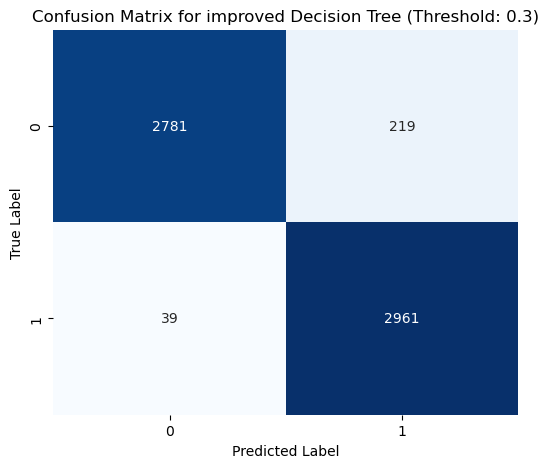

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the confusion matrix for threshold k=0.3
conf_matrix = results_threshold[0.3]["Confusion Matrix"]

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for improved Decision Tree (Threshold: 0.3)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


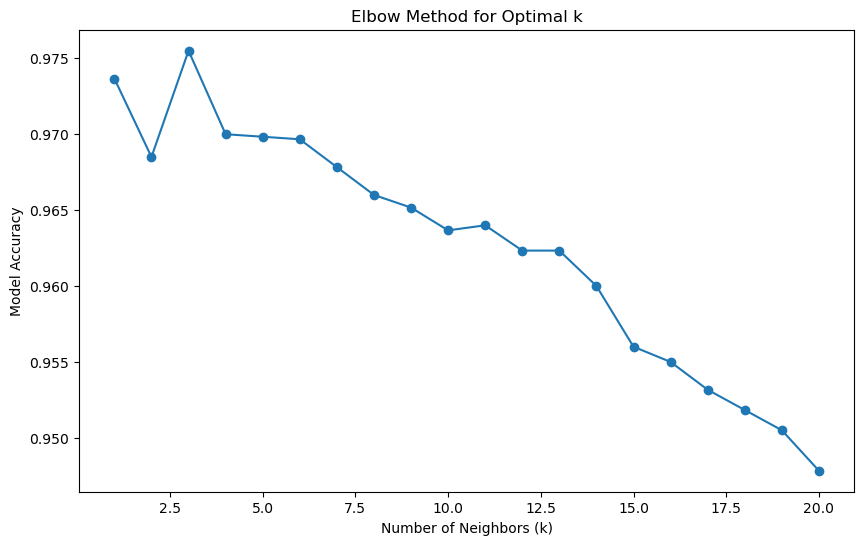

Silhouette Score for k=3: 0.02
Accuracy for k=3: 0.98


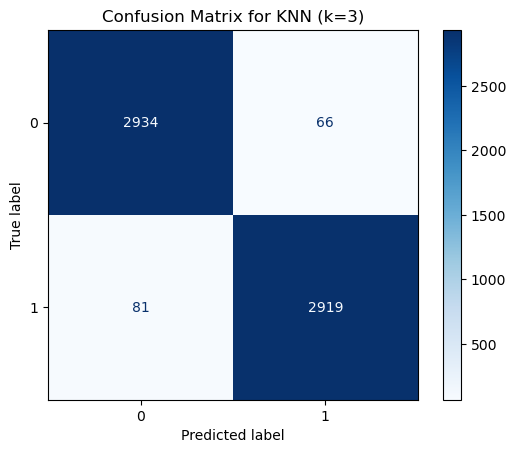

In [43]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns


# Assume reduced_data is already defined with 'class' column
X = reduced_data.drop('class', axis=1)
y = reduced_data['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Elbow Method to find the optimal k
inertia = []
k_range = range(1, 21)  # Check k from 1 to 20

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    inertia.append(model.score(X_test, y_test))

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Model Accuracy')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose the optimal k based on the plot
optimal_k = 3  # Replace with the value identified from the plot

# Fit KNN with the chosen k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate and print the Silhouette Score
silhouette_avg = silhouette_score(X_test, y_pred)
print(f'Silhouette Score for k={optimal_k}: {silhouette_avg:.2f}')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for k={optimal_k}: {accuracy:.2f}')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for KNN (k={optimal_k})')
plt.show()


In [45]:
import time

# Initialize a dictionary to store execution times
execution_times = {}

# Measure time taken for fitting each model
for name, model in models.items():
    start_time = time.time()  # Start timing
    model.fit(X_train, y_train)
    end_time = time.time()  # End timing
    execution_times[name] = end_time - start_time  # Store execution time

# Display execution times
for name, exec_time in execution_times.items():
    print(f"{name}: {exec_time:.4f} seconds")


Logistic Regression: 0.0626 seconds
Random Forest: 6.6459 seconds
SVM: 48.9198 seconds
KNN: 0.0303 seconds
Naive Bayes: 0.0015 seconds
Neural Network: 52.3605 seconds


C:\Users\Jani Begam\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [49]:
# Define the execution times data
execution_times = {
    "Logistic Regression": 0.0626,
    "Random Forest": 6.6459,
    "SVM": 48.9198,
    "KNN": 0.0303,
    "Naive Bayes": 0.0015,
    "Neural Network": 52.3605
}

# Create a DataFrame for the execution times
execution_times_df = pd.DataFrame(
    list(execution_times.items()), 
    columns=["Algorithm", "Execution Time (seconds)"]
)

# Display the DataFrame in a table format
print("Model Execution Times", execution_times_df)


Model Execution Times              Algorithm  Execution Time (seconds)
0  Logistic Regression                    0.0626
1        Random Forest                    6.6459
2                  SVM                   48.9198
3                  KNN                    0.0303
4          Naive Bayes                    0.0015
5       Neural Network                   52.3605
